In [1]:
# Import Data Analysis Tools
import numpy as np
import pandas as pd

# Import Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import CSV data locally
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")
gender_submissio = pd.read_csv("titanic/gender_submission.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train.shape[0]

891

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train = train.drop(columns=["Name", "Ticket"])
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


<AxesSubplot:title={'center':'The survival rate'}, ylabel='Survived'>

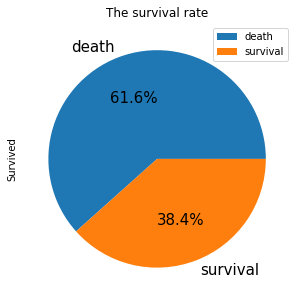

In [10]:
survived = train["Survived"].value_counts()
survived = survived.rename({0:"death", 1:"survival"}, axis='index')
survived.plot(kind='pie', autopct="%1.1f%%", title='The survival rate', fontsize=15, legend=True, figsize=(5, 5))

In [11]:
train['Embarked'][train['Embarked'].isnull()] = train['Embarked'].dropna().mode().values

In [12]:
test['Fare'][test['Fare'].isnull()] = test['Fare'].dropna().mean()

In [13]:
train['Cabin'].fillna('NaN', inplace=True)
train['Cabin'] = [initial[0] for initial in train['Cabin']]

train.groupby('Cabin')['Fare'].mean().sort_values(ascending=False)

Cabin
B    113.505764
C    100.151341
D     57.244576
E     46.026694
A     39.623887
T     35.500000
N     19.157325
F     18.696792
G     13.581250
Name: Fare, dtype: float64

In [14]:
test['Cabin'].fillna('Nan', inplace=True)
test['Cabin'] = [initial[0] for initial in test['Cabin']]

test.groupby('Cabin')['Fare'].mean().sort_values(ascending=False)

Cabin
B    145.562733
C    121.033460
E     84.921756
A     44.716657
D     42.251277
N     19.131428
F     17.076050
G     16.700000
Name: Fare, dtype: float64

In [15]:
def cabin_fillna(x):
    i = ''
    
    if x < 15:
        i = 'G'
    
    if x >= 15 and x < 27:
        i = 'F'
    
    if x >= 27 and x < 37:
        i = 'T'
    
    if x >= 37 and x < 43:
        i = 'A'
    
    if x >= 43 and x < 52:
        i = 'E'
    
    if x >= 52 and x < 79:
        i = 'D'
    
    if x >= 79 and x < 107:
        i = 'C'

    else:
        i = 'B'
        
    return i

In [16]:
has_NaN = train[train['Cabin'] == 'N']
not_has_NaN = train[train['Cabin'] != 'N']

has_NaN.Cabin = has_NaN.Fare.apply(lambda x : cabin_fillna(x))
train = pd.concat([has_NaN, not_has_NaN], axis = 0)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 889
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    object 
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 76.6+ KB


In [17]:
test_NaN = test[test['Cabin'] == 'N']
test_not_NaN = test[test['Cabin'] != 'N']

test_NaN.Cabin = test_NaN.Fare.apply(lambda x : cabin_fillna(x))
test = pd.concat([test_NaN, test_not_NaN], axis = 0)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 414
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B,S


In [19]:
train_age = train[['Age', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']]
age_notNull = train_age.loc[(train['Age'].notnull())]
age_null = train_age.loc[(train['Age'].isnull())]

X = age_notNull.values[: ,1:]
Y = age_notNull.values[:, 0]

regr = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
regr.fit(X, Y)

predict_age = regr.predict(age_null.values[:, 1:])
train.loc[train['Age'].isnull(), ['Age']] = predict_age
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 414
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [20]:
test_age = test[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']]
test_age_notNull = test_age.loc[(test['Age'].notnull())]
test_age_null = test_age.loc[(test['Age'].isnull())]

A = test_age_notNull.values[: ,1:]
B = test_age_notNull.values[:, 0]

regr = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
regr.fit(A, B)

test_predict_age = regr.predict(test_age_null.values[:, 1:])
test.loc[test['Age'].isnull(), ['Age']] = test_predict_age

In [21]:
train = train[train.Cabin != 'T']

In [22]:
train_final = train.drop(['PassengerId', 'Survived'], axis=1)
test_final = test.drop(['PassengerId', 'Ticket', 'Name'], axis=1)

X_train = pd.get_dummies(train_final)
Y_train = train.Survived
X_test = pd.get_dummies(test_final)

In [23]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,1,0,0,0,0,0,0,0,1
2,3,26.000000,0,0,7.9250,1,0,0,1,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,1,0,0,0,0,0,0,0,1
5,3,24.001878,0,0,8.4583,0,1,0,1,0,0,0,0,0,0,1,0
7,3,2.000000,3,1,21.0750,0,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,47.000000,1,1,52.5542,1,0,0,0,0,1,0,0,0,0,0,1
872,1,33.000000,0,0,5.0000,0,1,0,1,0,0,0,0,0,0,0,1
879,1,56.000000,0,1,83.1583,1,0,0,0,1,0,0,0,0,1,0,0
887,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,0,0,0,0,1


In [24]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0,0,0,0,0,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,1,0,0,0,0,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0,0,0,0,0,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,1,0,0,0,0,0,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1,43.0,1,0,27.7208,0,1,0,0,0,1,0,0,0,1,0,0
405,2,20.0,0,0,13.8625,0,1,0,0,0,1,0,0,0,1,0,0
407,1,50.0,1,1,211.5000,0,1,0,0,1,0,0,0,0,1,0,0
411,1,37.0,1,0,90.0000,1,0,0,0,1,0,0,0,0,0,1,0


In [25]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
Y_test = clf.predict(X_test)
clf.score(X_train, Y_train)

0.9910112359550561